<a href="https://colab.research.google.com/github/GabrielPPeres/AprendendoIA/blob/main/Aula_de_IA_220325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pandas.read_csv("average-monthly-surface-temperature.csv")

In [ ]:
print(df.head())

        Entity Code  year         Day  Average surface temperature daily  \
0  Afghanistan  AFG  1940  1940-01-15                          -2.032494   
1  Afghanistan  AFG  1940  1940-02-15                          -0.733503   
2  Afghanistan  AFG  1940  1940-03-15                           1.999134   
3  Afghanistan  AFG  1940  1940-04-15                          10.199754   
4  Afghanistan  AFG  1940  1940-05-15                          17.942135   

   Average surface temperature monthly  
0                            11.327695  
1                            11.327695  
2                            11.327695  
3                            11.327695  
4                            11.327695  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Entity                               198900 non-null  object 
 1   Code                                 198900 non-null  object 
 2   year                                 198900 non-null  int64  
 3   Day                                  198900 non-null  object 
 4   Average surface temperature daily    198900 non-null  float64
 5   Average surface temperature monthly  198900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB
None


In [ ]:
num_paises = df['Entity'].nunique()
print(f"Numero de paises: {num_paises}")

Numero de paises: 195


In [ ]:
pais_escolhido = ['Brazil']
df_filtrado = df[df['Entity'].isin(pais_escolhido)]
print(df_filtrado.head())

       Entity Code  year         Day  Average surface temperature daily  \
24480  Brazil  BRA  1940  1940-01-15                          24.304272   
24481  Brazil  BRA  1940  1940-02-15                          24.305620   
24482  Brazil  BRA  1940  1940-03-15                          24.284336   
24483  Brazil  BRA  1940  1940-04-15                          23.796352   
24484  Brazil  BRA  1940  1940-05-15                          23.440235   

       Average surface temperature monthly  
24480                            24.232492  
24481                            24.232492  
24482                            24.232492  
24483                            24.232492  
24484                            24.232492  


In [ ]:
def gerar_histogramas (pais, dados_pais):
  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  plt.hist(dados_pais['Average surface temperature daily'], bins=30, color='blue')
  plt.title('Média de temperatura diária no Brasil')
  plt.xlabel('Temperatura')
  plt.ylabel('Frequência')

  plt.subplot(1,2,2)
  plt.hist(dados_pais['Average surface temperature monthly'], bins=30, color='green')
  plt.title('Média de temperatura mensal no Brasil')
  plt.xlabel('Temperatura')
  plt.ylabel('Frequência')

  plt.tight_layout()
  plt.show()

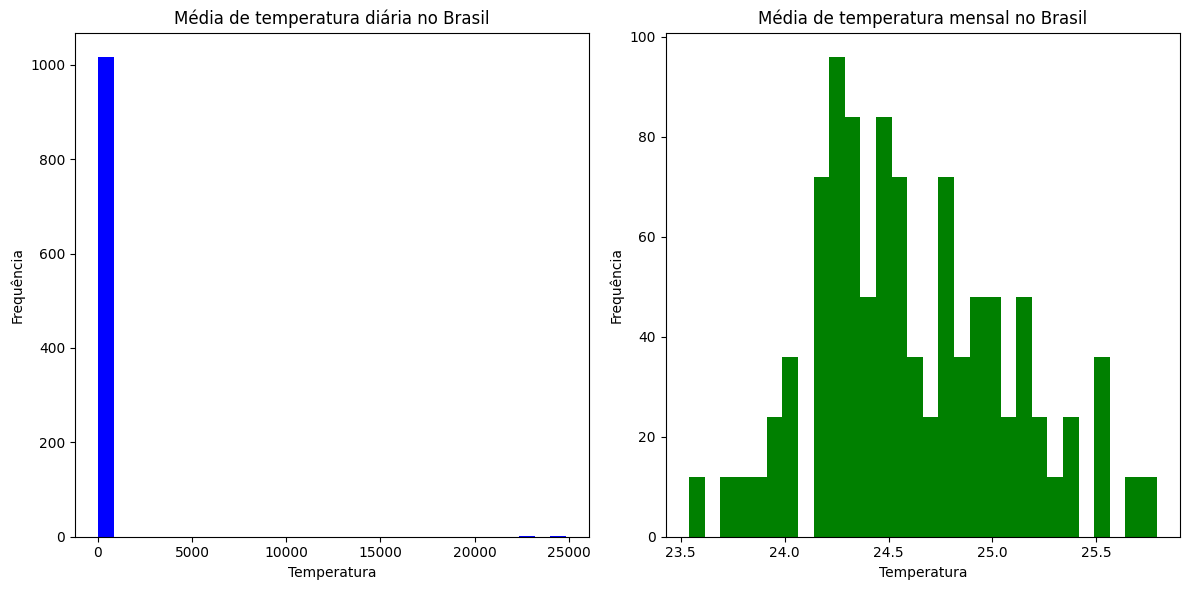

In [ ]:
gerar_histogramas(pais_escolhido,df_filtrado)

In [ ]:
def indentificar_outliers (coluna):
  Q1 = coluna.quantile(0.25)
  Q3 = coluna.quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
  return outliers

In [ ]:
outliers_dia = indentificar_outliers(df_filtrado['Average surface temperature daily'])
outliers_mes = indentificar_outliers(df_filtrado['Average surface temperature monthly'])

print(f"Outliers diários: {outliers_dia}")
print(f"Outliers mensais: {outliers_mes}")

Outliers diários: 24558    22855.000000
24677       21.772010
24740       27.570520
24741       27.509884
24765       28.702099
24906       21.690779
24972    24822.000000
24980    24843.000000
25485       27.549820
Name: Average surface temperature daily, dtype: float64
Outliers mensais: Series([], Name: Average surface temperature monthly, dtype: float64)


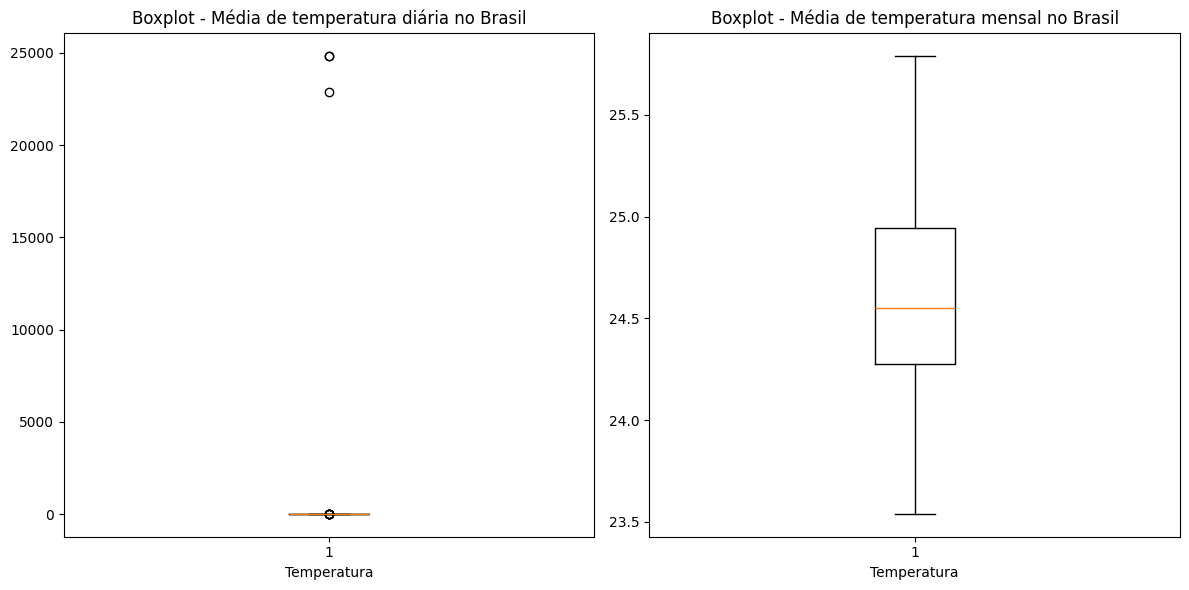

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.boxplot(df_filtrado['Average surface temperature daily'])
plt.title('Boxplot - Média de temperatura diária no Brasil')
plt.xlabel('Temperatura')

plt.subplot(1,2,2)
plt.boxplot(df_filtrado['Average surface temperature monthly'])
plt.title('Boxplot - Média de temperatura mensal no Brasil')
plt.xlabel('Temperatura')

plt.tight_layout()
plt.show()

In [ ]:
def indentificar_outliers_limite_superior (coluna):
  Q1 = coluna.quantile(0.25)
  Q3 = coluna.quantile(0.75)
  IQR = Q3
  limite_superior = Q3 + 1.5 * IQR

  outliers = coluna[(coluna > limite_superior)]
  return outliers

In [ ]:
outliers_dia_superior = indentificar_outliers_limite_superior(df_filtrado['Average surface temperature daily'])
print(outliers_dia_superior)

24558    22855.0
24972    24822.0
24980    24843.0
Name: Average surface temperature daily, dtype: float64


In [ ]:
df_sem_outliers = df_filtrado[~df_filtrado['Average surface temperature daily'].isin(outliers_dia_superior)]
print(df_sem_outliers.head)

<bound method NDFrame.head of        Entity Code  year         Day  Average surface temperature daily  \
24480  Brazil  BRA  1940  1940-01-15                          24.304272   
24481  Brazil  BRA  1940  1940-02-15                          24.305620   
24482  Brazil  BRA  1940  1940-03-15                          24.284336   
24483  Brazil  BRA  1940  1940-04-15                          23.796352   
24484  Brazil  BRA  1940  1940-05-15                          23.440235   
...       ...  ...   ...         ...                                ...   
25495  Brazil  BRA  2024  2024-08-15                          25.167578   
25496  Brazil  BRA  2024  2024-09-15                          27.159407   
25497  Brazil  BRA  2024  2024-10-15                          27.098417   
25498  Brazil  BRA  2024  2024-11-15                          26.324081   
25499  Brazil  BRA  2024  2024-12-15                          25.908457   

       Average surface temperature monthly  
24480                   

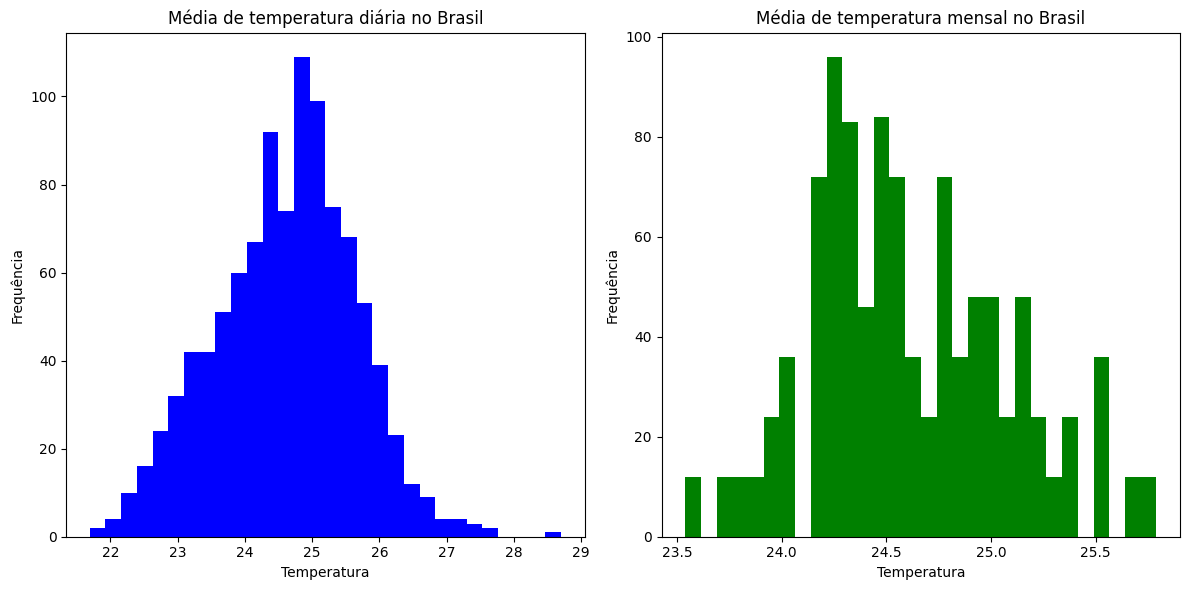

In [ ]:
gerar_histogramas(pais_escolhido,df_sem_outliers)